In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
from scipy.stats import zscore

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
dat = pd.read_csv('data/Absenteeism_at_work.csv', sep=';')

In [4]:
dat.columns = dat.columns.str.lower()
dat.columns

Index(['id', 'reason for absence', 'month of absence', 'day of the week',
       'seasons', 'transportation expense', 'distance from residence to work',
       'service time', 'age', 'work load average/day ', 'hit target',
       'disciplinary failure', 'education', 'son', 'social drinker',
       'social smoker', 'pet', 'weight', 'height', 'body mass index',
       'absenteeism time in hours'],
      dtype='object')

In [5]:
dat.rename(columns={
    'reason for absence': 'reason',
    'month of absence': 'month',
    'day of the week': 'day',
    'transportation expense' : 'transport_expense',
    'distance from residence to work': 'distance',
    'service time': 'service_time',
    'work load average/day ': 'daily_avg_work_load',
    'hit target': 'hit_target',
    'disciplinary failure': 'disciplinary_failure',
    'son': 'num_children',
    'social drinker': 'social_drinker',
    'social smoker': 'social_smoker',
    'body mass index': 'bmi',
    'absenteeism time in hours': 'absent_hours'
}, inplace=True)

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    740 non-null    int64  
 1   reason                740 non-null    int64  
 2   month                 740 non-null    int64  
 3   day                   740 non-null    int64  
 4   seasons               740 non-null    int64  
 5   transport_expense     740 non-null    int64  
 6   distance              740 non-null    int64  
 7   service_time          740 non-null    int64  
 8   age                   740 non-null    int64  
 9   daily_avg_work_load   740 non-null    float64
 10  hit_target            740 non-null    int64  
 11  disciplinary_failure  740 non-null    int64  
 12  education             740 non-null    int64  
 13  num_children          740 non-null    int64  
 14  social_drinker        740 non-null    int64  
 15  social_smoker         7

In [7]:
dat = dat.drop(columns=["id"])

In [8]:
dat.head()

,reason,month,day,seasons,transport_expense,distance,service_time,age,daily_avg_work_load,hit_target,disciplinary_failure,education,num_children,social_drinker,social_smoker,pet,weight,height,bmi,absent_hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


## Random Forest

In [25]:
# Assuming 'absent_hours' is your target variable
X = dat.drop(['absent_hours'], axis=1)  # Remove target and ID column
y = dat['absent_hours']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Handling Outliers in Target Variable

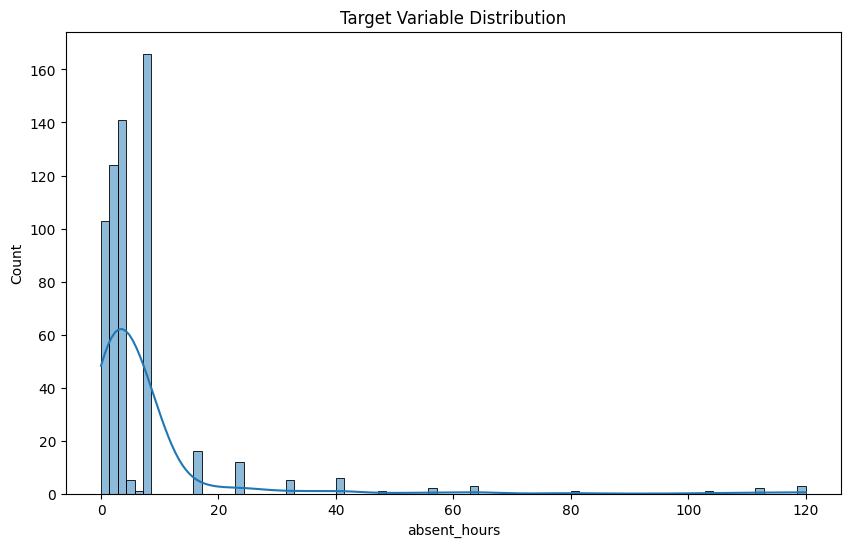

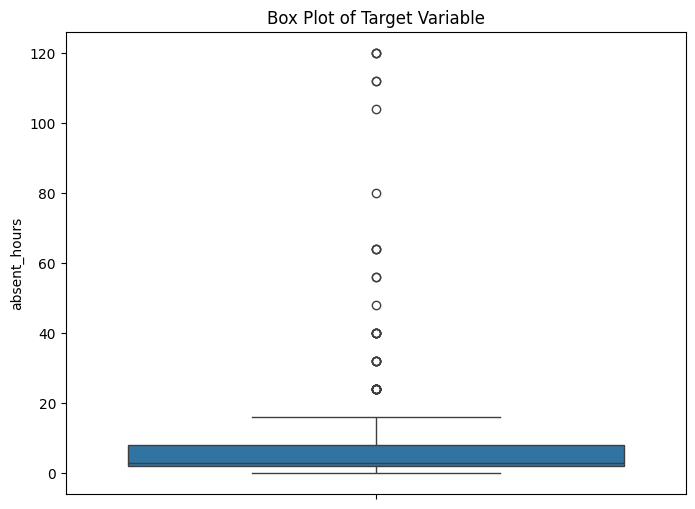

Number of outliers in target variable: 36 (6.08%)
Outlier bounds: [-7.00, 17.00]
Min: 0.00, Max: 120.00


In [27]:
# Visualize target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Target Variable Distribution')
plt.xlabel('absent_hours')
plt.show()

# Box plot of target variable
plt.figure(figsize=(8, 6))
sns.boxplot(y=y_train)
plt.title('Box Plot of Target Variable')
plt.ylabel('absent_hours')
plt.show()

# Calculate IQR for target variable
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
y_outliers = y_train[(y_train < lower_bound) | (y_train > upper_bound)]
print(f"Number of outliers in target variable: {len(y_outliers)} ({len(y_outliers)/len(y_train)*100:.2f}%)")
print(f"Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Min: {y_train.min():.2f}, Max: {y_train.max():.2f}")

In [26]:
y_train_clean = y_train[y_train <= upper_bound]
X_train_clean = X_train.loc[y_train_clean.index]

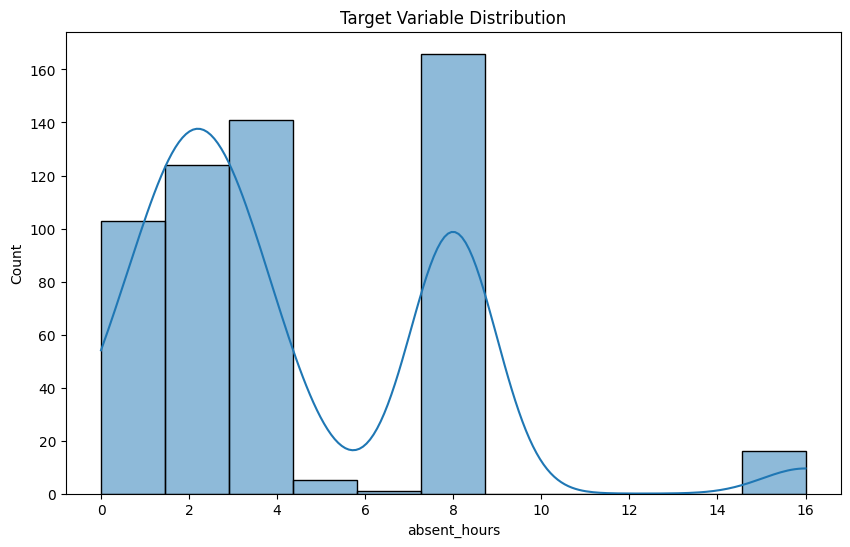

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train_clean, kde=True)
plt.title('Target Variable Distribution')
plt.xlabel('absent_hours')
plt.show()

In [28]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 244 to 102
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reason                556 non-null    int64  
 1   month                 556 non-null    int64  
 2   day                   556 non-null    int64  
 3   seasons               556 non-null    int64  
 4   transport_expense     556 non-null    int64  
 5   distance              556 non-null    int64  
 6   service_time          556 non-null    int64  
 7   age                   556 non-null    int64  
 8   daily_avg_work_load   556 non-null    float64
 9   hit_target            556 non-null    int64  
 10  disciplinary_failure  556 non-null    int64  
 11  education             556 non-null    int64  
 12  num_children          556 non-null    int64  
 13  social_drinker        556 non-null    int64  
 14  social_smoker         556 non-null    int64  
 15  pet                   556 

In [29]:
categorical_cols = [
    "reason", "month", "day", "seasons", "education",
    "disciplinary_failure", "social_drinker", "social_smoker", 
]


X_train_encoded = pd.get_dummies(X_train_clean, columns=categorical_cols, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

In [30]:
print("Train shape:", X_train_encoded.shape)
print("Test shape: ", X_test_encoded.shape)

Train shape: (556, 61)
Test shape:  (148, 55)


In [33]:
# Align the columns safely
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join='left', axis=1, fill_value=0)


## Train the basic Random Forest model


In [38]:
# Fit the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train_clean)

# Predict
y_pred = rf.predict(X_test_encoded)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.11667984156781575
MAE: 3.4693400096525093
MSE: 96.2586689815233


In [42]:
cv_scores = cross_val_score(rf, X_train_encoded, y_train_clean, cv=5, scoring='r2')
print("Cross-validated R²:", cv_scores.mean())

Cross-validated R²: 0.3339599080109962


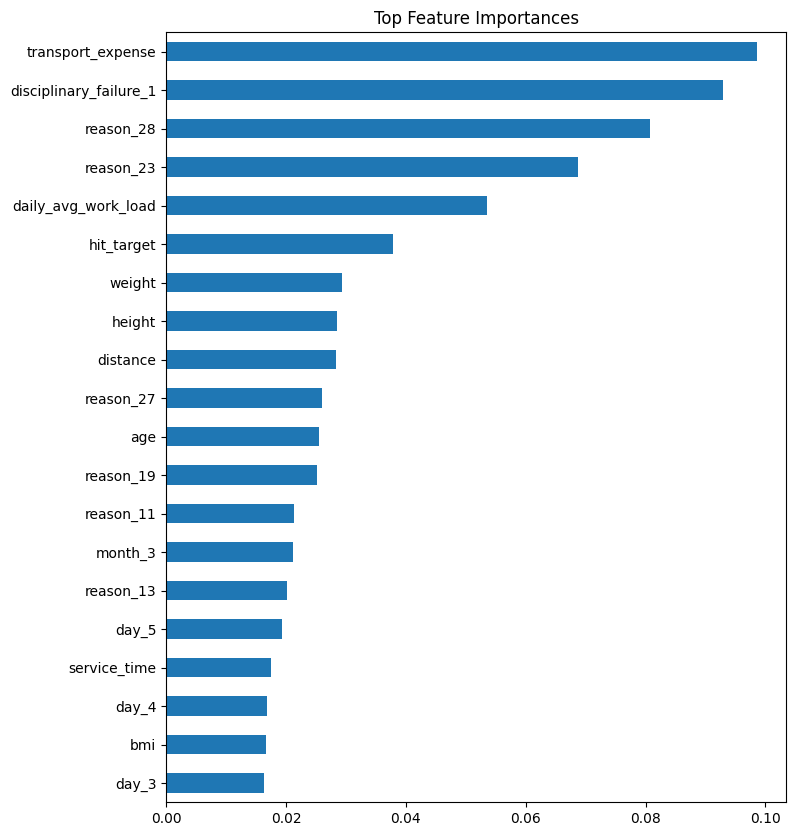

In [43]:
importances = pd.Series(rf.feature_importances_, index=X_train_encoded.columns)
importances_sorted = importances.sort_values(ascending=False)

# Visualize top 20
importances_sorted.head(20).plot(kind='barh', figsize=(8, 10))
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [50]:
top_features = importances_sorted.head(30).index.tolist() 
X_train_sel = X_train_encoded[top_features]
X_test_sel = X_test_encoded[top_features]

In [51]:
rf_sel = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sel.fit(X_train_sel, y_train_clean)

# Evaluate on test
y_pred_sel = rf_sel.predict(X_test_sel)
print("R² Score (selected features):", r2_score(y_test, y_pred_sel))


R² Score (selected features): 0.11546701890505884
